<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220527_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순차 데이터
 - 텍스트, 시계열데이터와 같이 순서에 의미가 있는 데이터
 - 데이터를 신경망 모델에 전달할 때 일반적인 경우(피드포워드 신경망)와 달리 순서가 중요
 - 이전에 입력한 데이터를 기억해야 한다

## 순환 신경망(RNN)
- 완전연결 신경망 + 이전데이터의 처리 흐름을 순환하는 고리
- 뉴런의 출력이 다시 자기 자신으로 전달(바로 이전에 사용했던 데이터를 재사용하는 셈)
- 순환신경망의 뉴런은 가중치가 하나 더 있다
- 이전 타임스탭의 은닉 상태에 곱해지는 가중치

용어정리

- **타임스탭** : 이전 샘플에 대한 기억을 가지고 처리하는 한 단계
- 타임스탭이 오래될수록 순환되는 정보는 희미해짐
- 순환신경망에서는 층을 **"셀"**로 부른다
- 완전연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현
- 셀의 출력을 **"은닉상태"**로 부른다
- 마지막 타임스텝의 은닉상태만 출력으로 내보냄

순환층의 입/출력
 - 샘플(시퀀스)마다 2개의 차원 
 - 시퀀스안에는 여러개의 아이템
 - 시퀀스의 길이가 타임스텝의 길이가 됨
 - 마지막 셀의 출력이 1차원이기 때문에 Flatten클래스로 펼칠 필요 없음 
 - 즉, 셀의 출력 그대로 밀집층에 사용
 >I am a boy → (1, 4, 3)
  - 샘플 1개
  - 타임스텝의 크기 4
  - 각 단어를 3개의 어떤 숫자로 표현
  - 순환층을 통과하면 두번째, 세번째 차원이 사라지고,
  - 순환층의 뉴런 개수만큼 출력됨

# IMDB 리뷰 데이터셋
 - imdb.com에서 수집한 리뷰를 긍정/부정으로 분류한 데이터셋
 - 총 50,000개 샘플 = 훈련 데이터 25,000개 + 테스트 데이터 25,000개

## 자연어 처리
 - 합성곱 신경망에서 이미지를 다룰 떄는 특별한 변환없음 : 이미지가 정수 픽셀값이기 때문
 - 텍스트 데이터는 단어마다 고유한 정수를 부여한다
   - 0:패딩, 1:문장시작, 2:어휘사전에 없음
 - 영어 문장은 모두 소문자로 바꾸고, 구둣점 삭제, 공백을 기준으로 분리 : **토큰**
 - 하나의 샘플은 여러개의 토큰으로 이루어짐
 - 1개의 토큰이 하나의 타임스텝에 해당

 - *한글은 조사가 발달되어, 공백으로 나누는것만으로는 부족하다. 형태소 분석이 필요함(고난도)*

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
# num_words=500 : 전체 데이터 셋에서 가장 자주 등장하는 단어 500개만 사용

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


훈련/테스트 세트의 배열이 1차원인 이유
 - IMDB 리뷰 텍스트는 길이가 제각각
 - 따라서 고정 크기의 2차원 배열 보다는 리뷰마다 파이썬 리스트로 담아야 메모리 효율적 사용가능
 >train_input : [리뷰1, 리뷰2, 리뷰3,...] 1차원 배열

 > 리뷰1 : 파이썬 리스트


In [ ]:
len(train_input[0]) # 첫번째 리뷰의 길이 : 218개의 토큰

218

In [ ]:
len(train_input[1]) # 두번째 리뷰의 길이 : 189개의 토큰

189

In [ ]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


 - IMDB 리뷰 데이터는 이미 정수로 변환되어있음
 - 앞서 num_words=500으로 지정(빈도순)했기 때문에 어휘사전에는 500개의 단어만 들어있음
 - 어휘사전에 없는 단어는 모두 2로 표시됨

In [ ]:
train_target[:20] # 총 25000개의 타깃 중 앞 20개출력

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

 - 이진분류 : 타깃값 0(부정), 1(긍정)

훈련세트(25,000개)에서 검증세트(20%) 분리

In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

각 리뷰의 길이를 계산해 넘파이 배열로
 - 평균적인 리뷰의 길이, 가장짧은/긴 리뷰 길이 확인

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input]) # 리스트의 각 리뷰를 순회하면서 길이를 배열로 담는다

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


 - 평균 단어 개수 239, 중간값 178
 - 평균이 중간값 보다 큰 이유 : 아주 큰 데이터가 적은 개수로 있다

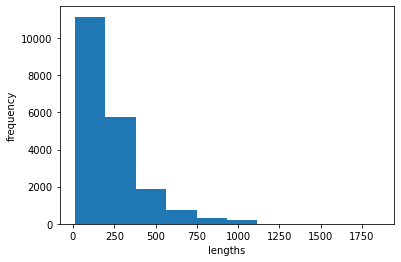

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

 - 리뷰길이가 주로 짧은 모습 : 대부분 300미만
 - train_input의 각 리뷰의 길이를 100개의 단어로 맞춘다(단어종류는 어휘사전에 따라 500개)
 - 길이가 짧으면 패딩(패딩을 나타내는 토큰 : 0)
 - 길이가 길면 잘라낸다(주로 앞을 자름)

케라스는 시퀀스 데이터의 길이를 맞추는 pad_sequences() 함수 제공

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
train_input.shape # 파이썬 리스트의 1차원 배열

(20000,)

In [ ]:
train_seq.shape # 2차원 배열

(20000, 100)

In [ ]:
train_seq[0] # 첫번째 샘플의 배열을 확인

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

 - 앞뒤에 패딩값 0이 없으니, 원래 100보다 길었을 것
 - 앞?뒤? 어디가 잘렸을까?

In [ ]:
train_input[0][-10:] # 원본 첫번째 샘플의 뒷부분 배열을 확인

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]

 - 뒤가 일치하니 앞부분이 잘린것을 추측가능
 - pad_sequence()함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 자름

 이유
   - 영화 리뷰는 보통 뒷부분의 정보(결정적 소감)가 유용하리라 기대됨
   - truncating 매개변수를 'post'로 바꾸면 뒷부분을 잘라냄

In [ ]:
train_seq[5] # 여섯번째 샘플

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

 - 앞부분이 0이 있는 것으로 보아 샘플의 길이가 100이 안됨
 - 패딩 토큰 0은 시퀀스의 앞부분에 추가됨
 
 이유
  - 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미침
  - padding 매개변수를 'post'로 바꾸면 뒷부분에 패딩추가

In [ ]:
val_seq = pad_sequences(val_input, maxlen=100) # 검증세트의 길이도 100으로 맞춤

### 순환 신경망 만들기
 - 가장 간단한 SimpleRNN 클래스


In [ ]:
from tensorflow import keras
model = keras.Sequential() # 모델 생성
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

 - 첫번째 매개변수 8 : 순환층의 뉴런개수
 - input_shape에 입력차원으로 (100,500) : 샘플의 길이 X 원-핫인코딩
 - 순환층의 활성화 함수 : 기본값인 tanh 하이퍼볼릭 탄젠트

원-핫 인코딩 사용이유
 - 토큰을 정수(0~499)로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만든다
 - 정수 사이에는 어떠한 관련이 없다(20번 토큰이 10번 토큰 보다 더 중요한 것이 아님)
 - **정숫값에 있는 크기 속성을 없애고 각 정수를 고유 하게 표현하는 방법 → 원-핫인코딩**
 - 토큰마다 어휘사전의 크기(0~499)만큼의 배열이 필요

In [ ]:
train_oh = keras.utils.to_categorical(train_seq) # keras가 제공하는 원-핫 인코딩 유틸리티

In [ ]:
print(train_seq.shape, train_oh.shape) # 100개의 토큰 각각이 500크기의 배열로 늘어남

(20000, 100) (20000, 100, 500)


In [ ]:
train_oh[0][0][:12] # 첫번째 샘플의 첫번째 토큰의 원-핫인코딩된 배열을(12개만) 보자

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
val_oh = keras.utils.to_categorical(val_seq) # 검증데이터도 같은방식으로 원-핫인코딩

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


 - 입력은 하나의 샘플에서 모든 토큰을 순서대로(타임스텝) 입력하며
 - **각 토큰은 500개의 입력값으로 순환층의 8개 뉴런과 완전연결됨** : 500 X 8 = 4,000개
 - 순환층의 은닉 상태는 다시 다음 타임스텝에서 사용되기 위해 Wh가중치와 곱해지는데, 하나의 뉴런에서 모든 타입스텝에 사용되는 가중치는 동일하다
 - **순환층의 은닉 상태는 각 타임스텝에서 본인을 포함한 다른 뉴런들과 완전연결됨** : 8 X 8 = 64개
 - W11~W18(순환층의 1번뉴런의 은닉값 - 8개의 뉴런 각 연결망에 곱해지는 가중치)

 - 뉴런마다의 절편 : 8개

### 순환 신경망 훈련

In [ ]:
# 기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도의 RMSprop 객체생성 후 매개변수로 전달
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, # 객체로 전달할때와 '명칭'으로 전달할때 표기법 유의
              loss='binary_crossentropy',
              metrics=['accuracy']) # 매개변수가 여러가지 전달 될수 있는경우 리스트에 넣어서 전달
# 가장 낮은 손실함수 값을 갖을때의 모델을 저장하기 위한 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
# 손실함수가 증가할때 모델 학습을 조기종료(시간절약, 메모리효율적사용)를 위한 콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target), # 검증데이터셋의 학습결과도 history 속성에 저장되도록함
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 33s 90ms/step - loss: 0.6974 - accuracy: 0.5096 - val_loss: 0.6938 - val_accuracy: 0.5232
Epoch 2/100
313/313 [==============================] - 30s 97ms/step - loss: 0.6779 - accuracy: 0.5653 - val_loss: 0.6637 - val_accuracy: 0.5988
Epoch 3/100
313/313 [==============================] - 26s 83ms/step - loss: 0.6447 - accuracy: 0.6366 - val_loss: 0.6370 - val_accuracy: 0.6516
Epoch 4/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6179 - accuracy: 0.6776 - val_loss: 0.6146 - val_accuracy: 0.6820
Epoch 5/100
313/313 [==============================] - 26s 85ms/step - loss: 0.5937 - accuracy: 0.7084 - val_loss: 0.5930 - val_accuracy: 0.7050
Epoch 6/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5732 - accuracy: 0.7280 - val_loss: 0.5762 - val_accuracy: 0.7182
Epoch 7/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5554 - accuracy: 0.7447 - val_loss: 0.5599 - val_ac

 - 37 번째 에포크에서 조기 종료
 - 34 번째 에포크 부터 검증데이터 손실함수 증가(3번참고 37번째에서 종료)
 - 검증 세트에 대한 정확도 79.4%

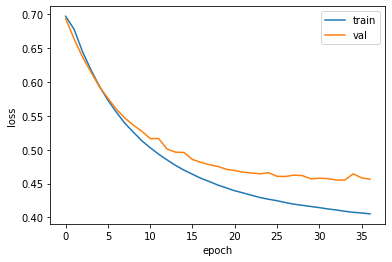

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

 - 학습에 굉장히 오랜시간 소요
 - 원-핫 인코딩으로 변환된 입력데이터의 크기가 너무 크다
 - 토큰 1개를 500차원 으로 늘렸기 때문에 데이터의 크기가 500배 차이

In [ ]:
print(train_seq.nbytes, train_oh.nbytes) # 증가된 차원의 크기만큼 커짐(500배)

8000000 4000000000


### 단어 임베딩
 - 원-핫 인코딩의 데이터 크기 증가되는 단점을 해결
  >원-핫 인코딩 : (100,) → (100,500)
  
  >단어 임베딩 : (100,) → (100,16) 
 - 의미있는 값으로 채워지므로 더 좋은 성능 
 - 입력으로 정수데이터를 받음 : train_oh배열이 아니라 train_seq 사용 가능

Embedding 클래스를 SimpleRNN 층 앞에 추가

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
# 어휘사전의크기 : 500, 임베딩 벡터의 크기 : 16, 입력 시퀀스의 길이 : 100
model2.add(keras.layers.SimpleRNN(8)) # RNN 순환층의 뉴런 : 8개
model2.add(keras.layers.Dense(1, activation='sigmoid')) # 출력층의 뉴런 : 1개 → 이진분류

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


 - Embedding 클래스는 500개의 각 토큰을 크기가 16인 벡터로 변경 : 500 X 16 = 8,000개 파라미터
 - 임베딩 벡터의 크기 16의 각 요소가 8개의 뉴런과 완전연결 : 16 X 8 = 128개 파라미터
 - 은닉층의 출력이 본인뉴런을 포함한 8개의 뉴런에 전달(완전연결) : 8 X 8 = 64개 파라미터
 - 뉴런마다 각 절편 : 8개 파라미터


 - 8개의 뉴런이 출력층의 1개의 뉴런과 연결 : 가중치8개 + 절편1개 파라미터